In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [2]:
class Game():
    def __init__(self):
        self.dealer = []
        self.dpts = 0
        self.player = []
        self.ppts = 0
    def start(self):
        self.dealer = np.random.choice(13,2)
        self.player = np.random.choice(13,2)
        self.face()
    def face(self):
        self.dealer[self.dealer>9]=9
        self.player[self.player>9]=9
    def drawcard(self,holder):
        if holder == "dealer":
            self.dealer = np.append(self.dealer,np.random.choice(13))
        elif holder == "player":
            self.player = np.append(self.player,np.random.choice(13))
        self.face()
    def count0or10(self,holder=None,target=None):
        if holder == "dealer":
            target = self.dealer
        elif holder == "player":
            target = self.player
        total = sum(target)
        anyAce = target==0
        i=0
        for i in range(sum(anyAce)):
            if total+10 >20:
                break
            else:
                total+=10
        return total
    def playerpolicy(self):
        total = self.count0or10('player')
        while total<19:
            self.drawcard('player')
            total = self.count0or10('player')
        total = self.count0or10('player')
        return total
    def dealerpolicy(self): 
        #no hit forever, only decide to count 0 as 10 if possible
        total = self.count0or10('dealer')
        return total
    def result(self):
        tp = self.playerpolicy()
        dp = self.dealerpolicy()
        if tp>20 and dp>20:
            result = 0
        else:
            if tp==dp: result=0
            if tp==20: result=1
            if dp==20: result=-1
            if tp>dp: 
                result=1
            else:
                result=-1
        return tp,dp,result

In [3]:
setting = Game()
setting.start()
tp,dp,result = setting.result()
print("Dealer: ",setting.dealer,dp)
print("Player: ",setting.player,tp)
print("result: ",result)


Dealer:  [6 7] 13
Player:  [0 9] 19
result:  1


In [4]:
def plotSValFunc(epoch):
    statesace=np.zeros((10,10))
    statesno =np.zeros((10,10))
    for i in range(epoch):
        setting.start()
        tp,dp,result = setting.result()
        total = setting.count0or10(target=setting.player[:2])
        if sum(setting.player==0)>0:
            statesace[setting.dealer[0]][total-11]+=result
        else:
            statesno[setting.dealer[0]][total-11]+=result
    ax1 = plt.subplot(1,2,1); pos1 = ax1.imshow(statesace/epoch)
    ax2 = plt.subplot(1,2,2); pos2 = ax2.imshow(statesno/epoch)
    plt.colorbar(pos1, ax=ax1)
    plt.colorbar(pos2, ax=ax2)

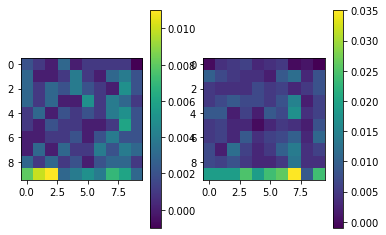

In [5]:
plotSValFunc(1000)

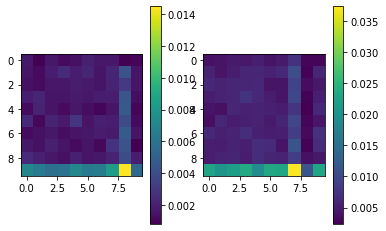

In [6]:
plotSValFunc(10000)

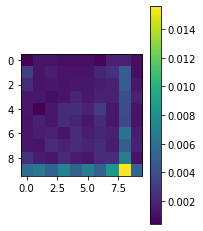

In [25]:
statesace=np.zeros((10,10))
statesno =np.zeros((10,10))
epoch = 5000
for i in range(epoch):
    setting.start()
    tp,dp,result = setting.result()
    total = setting.count0or10(target=setting.player[:2])
    if sum(setting.player==0)>0:
        statesace[setting.dealer[0]][total-11]+=result
    else:
        statesno[setting.dealer[0]][total-11]+=result
ax1 = plt.subplot(1,2,1); pos1 = ax1.imshow(statesace/epoch)
plt.colorbar(pos1, ax=ax1)


In [26]:
np.max(statesace)

78.0

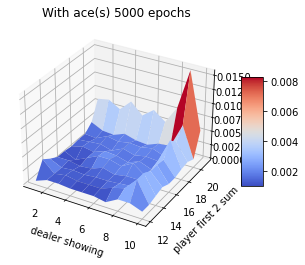

In [27]:
fig = plt.figure()
x = np.arange(1,11,1)
y = np.arange(12,22,1)
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X,Y,statesace/epoch,cmap=cm.coolwarm)
ax1.set_zlim(0,np.max(statesace)/epoch)
plt.xlabel('dealer showing')
plt.ylabel('player first 2 sum')
plt.title('With ace(s) {} epochs'.format(epoch))
fig.colorbar(surf, shrink=0.5, aspect=5)

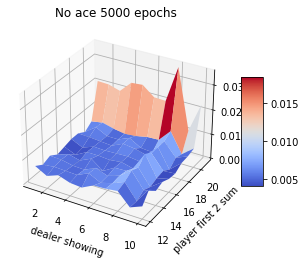

In [28]:
fig = plt.figure()
x = np.arange(1,11,1)
y = np.arange(12,22,1)
X,Y = np.meshgrid(x,y)
ax1 = fig.add_subplot(111, projection='3d')
surf = ax1.plot_surface(X,Y,statesno/epoch,cmap=cm.coolwarm)
ax1.set_zlim(0,np.max(statesno)/epoch)
plt.xlabel('dealer showing')
plt.ylabel('player first 2 sum')
plt.title('No ace {} epochs'.format(epoch))
fig.colorbar(surf, shrink=0.5, aspect=5)